In [1]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')
df

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
list1 = list(df.columns)

print("shape of dataframe before removal of Outlier ", df.shape)
for x in list1:
    mean = df[x].mean()
    sd = numpy.std(df[x])
    upper_limit = mean + 3*sd
    lower_limt = mean - 3*sd
    new_df = pd.DataFrame()
    new_df = df[(df[x] >= upper_limit) | (df[x] <= lower_limt)]
    if len(new_df)>0:
        print("Outlier is there in the column ", x)
        df = df[(df[x] < upper_limit) & (df[x] > lower_limt)]
        print("Removed outlier from column ", x)
    else:
        print("There is no outlier in the column ", x)
    print("----------------------------------------------------------")
print("shape of dataframe after removal of Outlier ", df.shape)

shape of dataframe before removal of Outlier  (685, 9)
There is no outlier in the column  Pregnancies
----------------------------------------------------------
There is no outlier in the column  Glucose
----------------------------------------------------------
Outlier is there in the column  BloodPressure
Removed outlier from column  BloodPressure
----------------------------------------------------------
There is no outlier in the column  SkinThickness
----------------------------------------------------------
Outlier is there in the column  Insulin
Removed outlier from column  Insulin
----------------------------------------------------------
Outlier is there in the column  BMI
Removed outlier from column  BMI
----------------------------------------------------------
Outlier is there in the column  DiabetesPedigreeFunction
Removed outlier from column  DiabetesPedigreeFunction
----------------------------------------------------------
Outlier is there in the column  Age
Removed out

In [ ]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


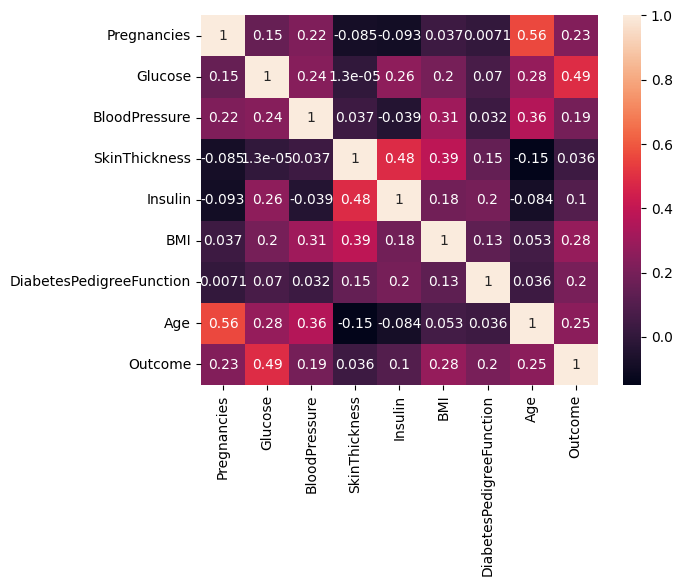

In [ ]:
sns.heatmap(df.corr(), annot = True, cbar = True)
plt.show()

In [ ]:
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']
sc = StandardScaler()
X = sc.fit_transform(X)


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state=3,test_size=0.3)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(463, 8)
(199, 8)
(463,)
(199,)


In [ ]:
model = LogisticRegression()
model.fit(train_x, train_y)
pv = model.predict(test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))
print('Confusion Matrix is')
confusion_matrix(pv, test_y)

Accuracy score is :  0.7889447236180904
Confusion Matrix is


array([[123,  30],
       [ 12,  34]])

In [ ]:
(123 + 34)/199

0.7889447236180904

In [ ]:
test_y.value_counts()

0    135
1     64
Name: Outcome, dtype: int64

In [4]:
# It an imbalanced data in dependent variable so we need to rely on f1 score

f1_score(pv, test_y)

print(0.6 + 18/101 + 16/180 + 18/210)

NameError: name 'f1_score' is not defined